### **Rainfall Prediction:**

### ***Importing libraries and dataset***

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
rain_data=pd.read_csv('/content/Rainfall.csv')

In [ ]:
rain_data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [ ]:
rain_data.shape

(366, 12)

In [ ]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
rain_data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


### ***Data cleaning***

In [ ]:
rain_data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
rain_data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
rain_data.rename(str.strip,axis='columns',inplace=True)
rain_data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
for col in rain_data.columns:
  if rain_data[col].isnull().sum()>0:
    val=rain_data[col].mean()
    rain_data[col]=rain_data[col].fillna(val)
rain_data.isnull().sum().sum()

0

### ***Exploratory data Analysis:***

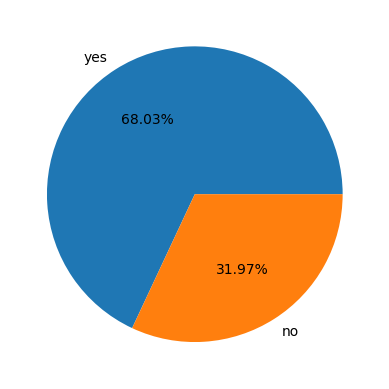

In [21]:
plt.pie(rain_data['rainfall'].value_counts().values,labels=rain_data['rainfall'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [17]:
rain_data.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [26]:
features=list(rain_data.select_dtypes(include=np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


<ipython-input-35-f405ba63875b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows,3,i+1)
<ipython-input-35-f405ba63875b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rain_data[col])
<ipython-input-35-f405ba63875b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to

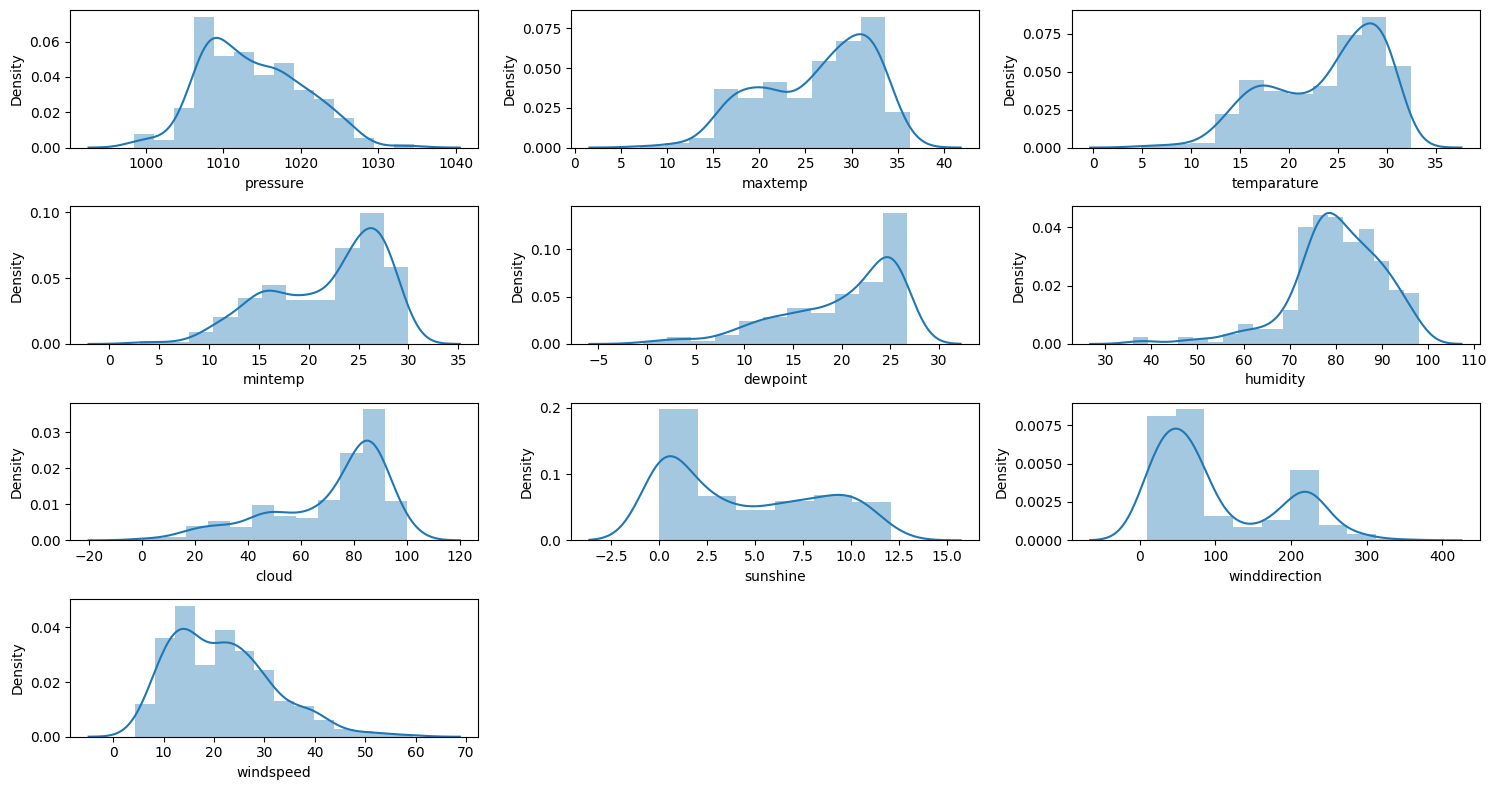

In [35]:
plt.subplots(figsize=(15,8))
nrows = (len(features) + 2) // 3
for i,col in enumerate(features):
  plt.subplot(nrows,3,i+1)
  sns.distplot(rain_data[col])
plt.tight_layout()
plt.show()

<ipython-input-38-b14adb06a3b4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,i+1)


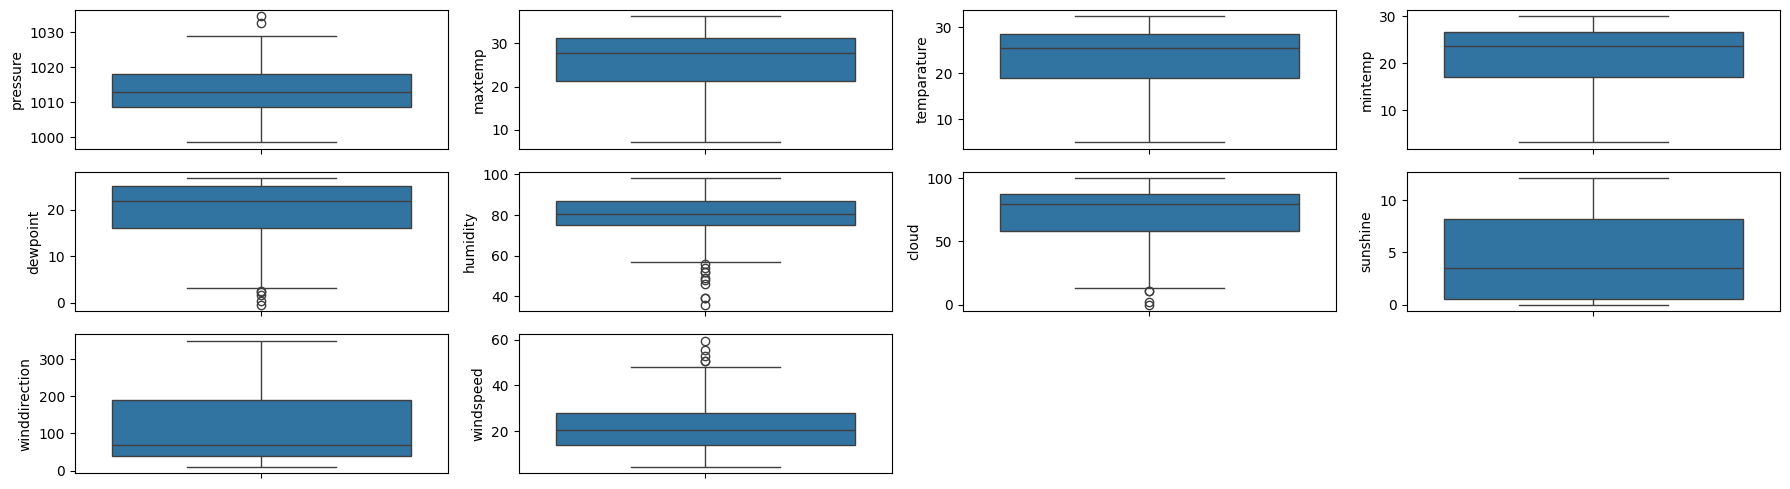

In [38]:
plt.subplots(figsize=(18,5))
for i,col in enumerate(features):
  plt.subplot(3,4,i+1)
  sns.boxplot(rain_data[col])
plt.tight_layout()
plt.show()

In [40]:
rain_data.replace({'yes':1,'no':0},inplace=True)
rain_data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


<Axes: >

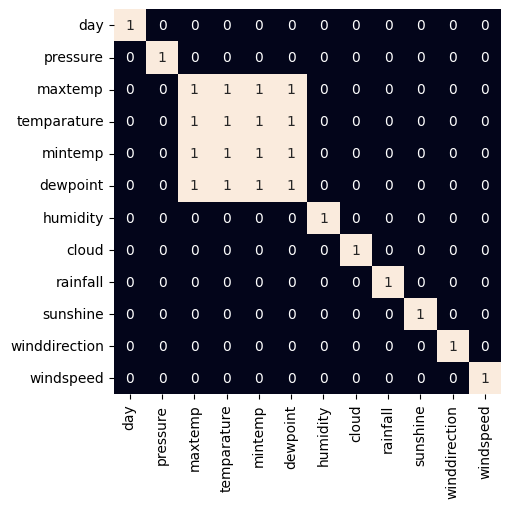

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(rain_data.corr()>0.8,annot=True,cbar=False)

In [43]:
rain_data.drop(['maxtemp','mintemp'],axis=1,inplace=True)

### ***Model training***

In [44]:
features=rain_data.drop(['day','rainfall'],axis=1)
target=rain_data['rainfall']

In [49]:
x_train,x_val,y_train,y_val=train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)
ros=RandomOverSampler(sampling_strategy='minority',random_state=22)
X,Y=ros.fit_resample(x_train,y_train)

In [54]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
x_val=scaler.transform(x_val)

In [57]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(x_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8893967324057472
Validation Accuracy :  0.8949999999999999

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.78

SVC(probability=True) : 
Training Accuracy :  0.902641347440721

### **Model evaluation**

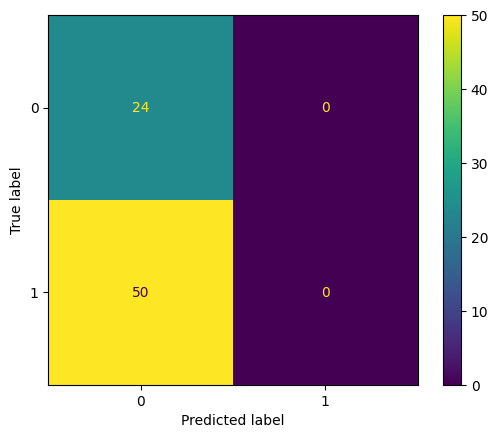

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
ConfusionMatrixDisplay.from_estimator(models[2],x_val,y_val)
plt.show()

In [74]:
print(metrics.classification_report(y_val,models[2].predict(x_val)))

              precision    recall  f1-score   support

           0       0.32      1.00      0.49        24
           1       0.00      0.00      0.00        50

    accuracy                           0.32        74
   macro avg       0.16      0.50      0.24        74
weighted avg       0.11      0.32      0.16        74

